In [6]:
%matplotlib notebook
# https://stackoverflow.com/questions/43599018/is-there-a-way-to-get-matplotlib-path-contains-points-to-be-inclusive-of-boundar
#I do quite like this command in Jupiter notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#It makes things wider and not waste the space on your screen
import pandas as pd
import importlib
import csv,os
import numpy as np
import pandas as pd
import itertools
import pyproj
import shapely
import copy
from uafgi import gicollections,cfutil,glacier,gdalutil,shputil,pdutil
import uafgi.data.ns642
import netCDF4
import matplotlib.pyplot as plt
import uafgi.data.wkt
import uafgi.data.w21 as d_w21
map_wkt = uafgi.data.wkt.nsidc_ps_north
pd.set_option("display.max_rows", 30, "display.max_columns", None)

In [10]:
w21x = pd.read_pickle('w21x.df')
w21x=w21x[~w21x['w21t_key'].isin(('Farquhar', 'Koge Bugt C'))]
w21x.columns

Index(['time', 'ice_advection', 'ice_front_undercutting', 'ice_front_retreat',
       'thinning_induced_retreat', 'calving', 'w21t_key', 'aflux_w21',
       'sflux_w21', 'sflux1_w21', 'sigma_max_w21', 'aflux_its', 'sflux_its',
       'sflux1_its', 'sigma_max_its'],
      dtype='object')

In [11]:
w21x

,time,ice_advection,ice_front_undercutting,ice_front_retreat,thinning_induced_retreat,calving,w21t_key,aflux_w21,sflux_w21,sflux1_w21,sigma_max_w21,aflux_its,sflux_its,sflux1_its,sigma_max_its
16,2011.0,1.202709,-0.261631,-0.121865,-1.426411e-02,-1.048679,F Graae,1.183913,310015.745624,314937.712794,300318.495365,1.317845,314404.594596,286936.098717,273616.699214
17,2012.0,1.198620,-0.244258,-0.028997,-2.318487e-02,-0.960174,F Graae,1.001103,380920.366482,456075.589750,474992.728814,1.224682,280995.743011,275015.913449,286423.045066
18,2013.0,1.108073,-0.253840,0.067500,-3.377885e-02,-0.752953,F Graae,0.701135,85849.442311,135676.285866,180192.140455,1.156494,264830.724803,253742.564764,336996.370275
19,2014.0,1.209284,-0.258015,-0.075156,-2.372200e-02,-1.002703,F Graae,1.197912,463334.886130,467733.338869,466472.345558,1.324472,369283.472872,337167.214192,336258.222750
20,2015.0,1.160736,-0.281152,0.042918,-6.913185e-03,-0.829753,F Graae,1.370384,492230.042751,416926.484737,502470.851412,1.387529,415356.864754,347466.485566,418759.151147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2013.0,2.084563,-0.462860,0.328629,-7.869327e-02,-1.214380,Upernavik Isstrom C,0.052828,14605.957603,576345.274851,474600.444742,0.043183,13120.836292,633382.736385,521568.826010
19,2014.0,2.083193,-0.429575,-0.456996,-3.494517e-01,-1.761162,Upernavik Isstrom C,0.087620,22692.686478,539525.900810,306346.521445,0.063009,16089.070214,531930.922596,302034.040519
20,2015.0,2.128856,-0.426739,-1.390665,-1.098740e-01,-2.982909,Upernavik Isstrom C,0.294873,113200.594744,817259.892389,273980.825030,0.265054,68150.766304,547372.529589,183502.920738
21,2016.0,2.258124,-0.390229,-0.153149,2.220446e-16,-2.021044,Upernavik Isstrom C,0.232503,62179.578916,603902.593108,298807.282455,0.301045,52645.232083,394889.491266,195388.887383


<IPython.core.display.Javascript object>


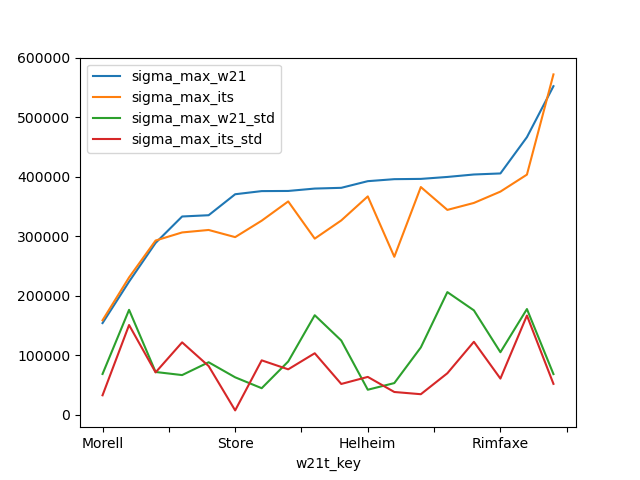

In [25]:
sg=w21x.groupby(['w21t_key'])
cols = ('sigma_max_w21', 'sigma_max_its')
dfm = sg.mean()[[*cols]]
dfs = sg.std()[[*cols]].rename(columns=dict((x,x+'_std') for x in cols))
df = pdutil.merge_nodups(dfm, dfs, how='outer', left_index=True, right_index=True)
df = df.sort_values(by='sigma_max_w21')
df.plot()
df
df.to_csv('sigma_max_byglacier.csv')

<IPython.core.display.Javascript object>


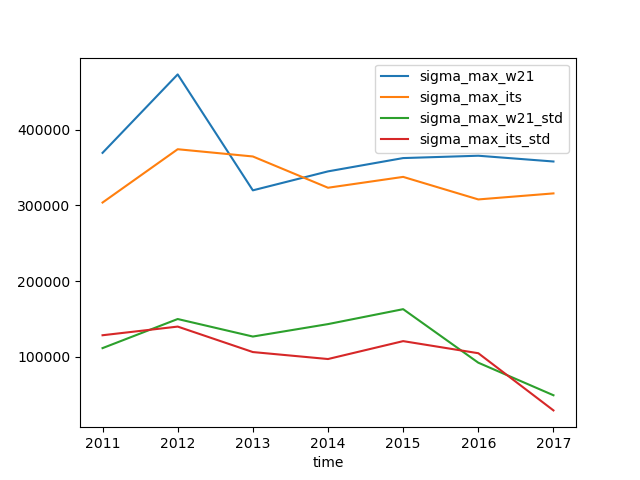

In [24]:
sg=w21x.groupby(['time'])
cols = ('sigma_max_w21', 'sigma_max_its')
dfm = sg.mean()[[*cols]]
dfs = sg.std()[[*cols]].rename(columns=dict((x,x+'_std') for x in cols))
df = pdutil.merge_nodups(dfm, dfs, how='outer', left_index=True, right_index=True)
df.plot()
df
df.to_csv('sigma_max_byyear.csv')